# Lesson 6 -  Solutions
These exercises are to help you check your understanding during class. They will not be collected.

## Part 1 - Review and setup 

### Exercise 1 - Review

There is a CSV file called `NYC_Tree_Census_small.csv` in the `~/shared/data` folder. This file contains information about the trees in New York City in 2015. This data comes from the [NYC OpenData project](https://opendata.cityofnewyork.us/).

One of the variables in the tree census data is health. This is a categorical variaple that indicates how healthy the tree is. 

- Load the dplyr package.
- Import the NYC tree census data and store it as a data frame called nyc_trees.
- Look at the first three rows of `nyc_trees` to verify that it imported successfully and to get a sense of the data. 

In [2]:
# import the data
nyc_trees <- read.csv('~/shared/data/NYC_Tree_Census_small.csv')

# load the dplyr package
library(dplyr)

head(nyc_trees, 3)

Warning message in file(file, "rt"):
“cannot open file '/home/instructor/shared/data/NYC_Tree_Census_small.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


## Exercise 2 - Tree diameters
According to the [NYC Tree Census documentation](https://data.cityofnewyork.us/api/views/pi5s-9p35/files/2e1e0292-20b4-4678-bea5-6936180074b3?download=true&filename=StreetTreeCensus2015TreesDataDictionary20161102.pdf), 'status' variable has three possible values: `"Alive"`, `"Dead"` and `"Stump"`. The `tree_dbh` variable contains the diameter of the living trees measured at approximately 54 inches above the ground. The diameters are rounded to the nearest whole inch. 

- Use `filter()` to extract just the living trees from the data frame. Store the extracted data in a data frame called `live_trees`.
- What is the maximum diameter of a living tree? What is the minimum diameter of a living tree?

In [15]:
# Filter data
live_trees <- filter(nyc_trees, status == "Alive")

# Find maximum and minimum diameters
max(live_trees$tree_dbh)
min(live_trees$tree_dbh)

[1] 64

[1] 0

The maximum diameter of a living tree is 64 inches. The minimum diameter is 0 inches. This is possible if the diameter was measured at under half an inch and then rounded down or if the tree was less than 54 inches tall.

### Exercise 3 - Tree health numbers
The `health` variable has four possible values: `"Good"`, `"Fair"`, `"Poor"`, and `""`, The blank entries correspond to stumps and dead trees. 

- Use the ```group_by()``` and ```summarize()``` functions to determine how many of the living trees were recorded with each level of health.

In [7]:
# Group and summarize
live_trees <- group_by(live_trees, health)
summarize(live_trees, Number_of_Trees = n()) # n() count number of obs in group

health,Number_of_Trees
Good,7778
Fair,1413
Poor,373


In [5]:
# Extra. This command tells R how to order the three possible values in the health column. 
live_trees <- ungroup(live_trees)
live_trees <- mutate(live_trees, health = factor(health, levels=c("Good", "Fair", "Poor")))

## Part 2 - Bar charts

### Exercise 4 - Meet the functions

 - Load the ```ggplot2``` package by excuting the ```library('ggplot2')``` command. You can ignore the warning about overwritten methods.
 - Look at the documentation for the ```ggplot()``` function. What is the first argument (a.k.a input) that this functions take?
 - Look at the documentation for the ```aes()``` function. What term is "aes" a shorting of?

In [9]:
# Load ggplot
library('ggplot2')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [ ]:
# View documentation for ggplot
?ggplot

The first argument is the data frame.

In [6]:
 # view documentation for aes
?aes

"aes" is short for aesthetic mapping

### Exercise 5 - Health Bars

The goal of this exercise is to produce a visual representation of the information in the summarize table from exercise 3.

- Execute the code in the first cell below to tell R to our prefered dimmensions for plots.
- Replace the words in all caps in the second cell below so that it produce a bar chart that shows the number of trees with each level of health. 

In [10]:
# Resizes all plots to 5 in by 4 in
library(repr)
options(repr.plot.width=4, repr.plot.height=3)

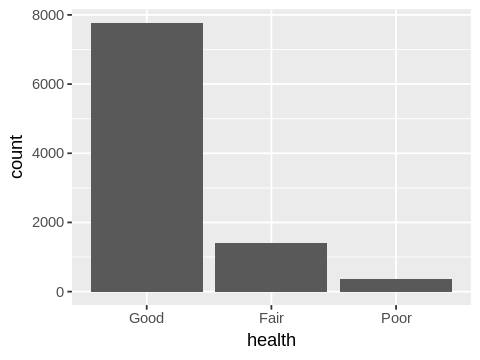

In [11]:
ggplot(live_trees, aes(x = health)) + geom_bar()

### Exercise 6 - Trees by borough
- Use the documentation linked above, the `names()` function or the `str()` function to determine the name of the variable in the nyc_trees dataframe that records the borough that the tree is in. 
- Create a bar chart that shows the number of living trees in each borough.

Hint: There are multiple columns with information about the borough. Choose the one that is most human readable.

The `boroname` variable indicates in which borough the tree is located.

In [16]:
live_trees <- ungroup(live_trees)
live_trees <- mutate(live_trees, boroname = factor(boroname, levels=c("Manhattan", "Brooklyn", "Bronx", "Queens", "Staten Island")))

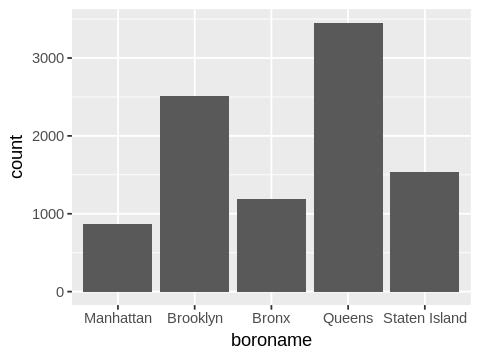

In [17]:
ggplot(live_trees, aes(x = boroname)) + geom_bar()

## Part 3 - Histograms

### Exercise 7 - Tree diameters
- Replace the words in all caps in the command below so that it produce a histogram of the diameters of the living trees broken into four bins. You can think of these groups as small medem, large and extra large.
- In a new code cell, generate a second histogram with the diameters of the living trees broken into 20 bins. 

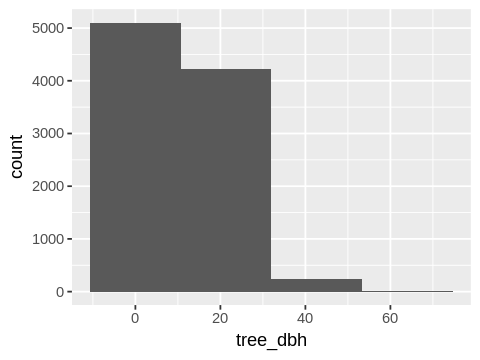

In [18]:
ggplot(live_trees, aes(x = tree_dbh)) + geom_histogram(bins= 4)

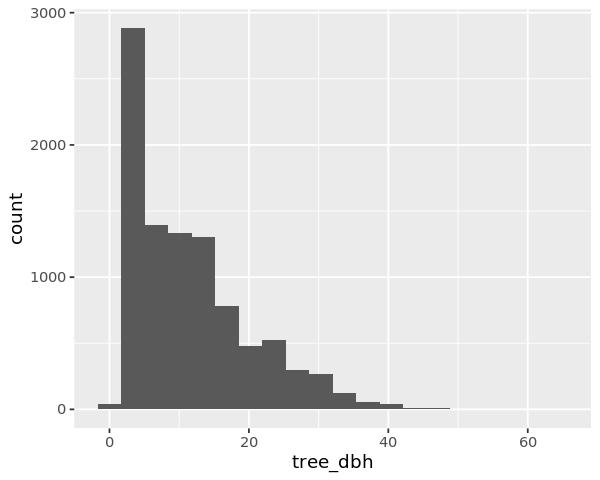

In [37]:
ggplot(live_trees, aes(x = tree_dbh)) + geom_histogram(bins= 20)

### Exercise 8 - Stump diameters
The `stump_diam` variable contains the diameters of the stumpts rouned to the nearest inch. 

- Create a histogram of the tree diameters of the stumps broken into 20 bins.
- How does this distribuition compare to that for the living trees?

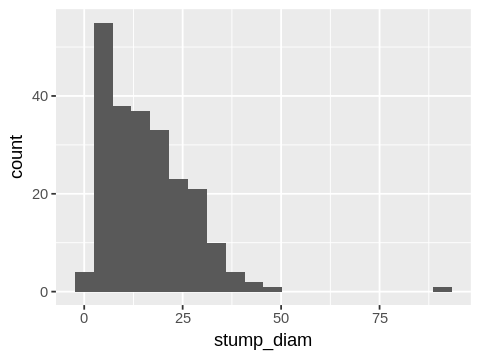

In [19]:
stumps <- filter(nyc_trees, status=="Stump")
ggplot(stumps, aes(x = stump_diam)) + geom_histogram(bins= 20)

A higher proportion of the stumpts have larger diameters. This makes sense and stumps are more likely to come from older thicker trees. 

## Examples from notes

In [42]:
nyc_dogs <- read.csv('../shared/data/NYC_Dog_Licensing.csv') 
nyc_dogs <- mutate(nyc_dogs, Age = 2021-AnimalBirthYear)
head(nyc_dogs, 3)

,X,RowNumber,AnimalName,AnimalGender,AnimalBirthYear,BreedName,Borough,ZipCode,LicenseIssuedDate,LicenseExpiredDate,Extract.Year,Age
,<int>,<int>,<fct>,<fct>,<int>,<fct>,<lgl>,<int>,<fct>,<fct>,<int>,<dbl>
1,1,34510,ESCO,F,2015,Pekingese,NA,10012,12/15/2015,2021-12-12,2016,6
2,2,37953,FLAX,M,2011,Portuguese Water Dog,NA,10012,01/13/2016,2021-03-05,2016,10
3,3,43865,ZOE,F,2013,Maltese,NA,10014,02/15/2016,2021-02-15,2016,8


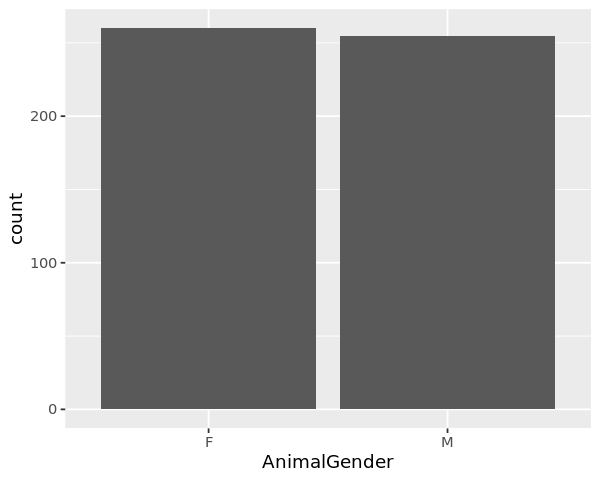

In [43]:
ggplot(nyc_dogs, aes(x=AnimalGender)) + geom_bar()

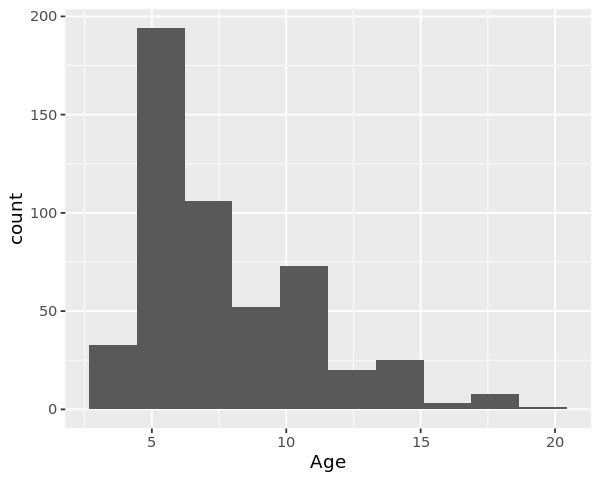

In [44]:
ggplot(nyc_dogs, aes(x=Age)) + geom_histogram(bins=10)